In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

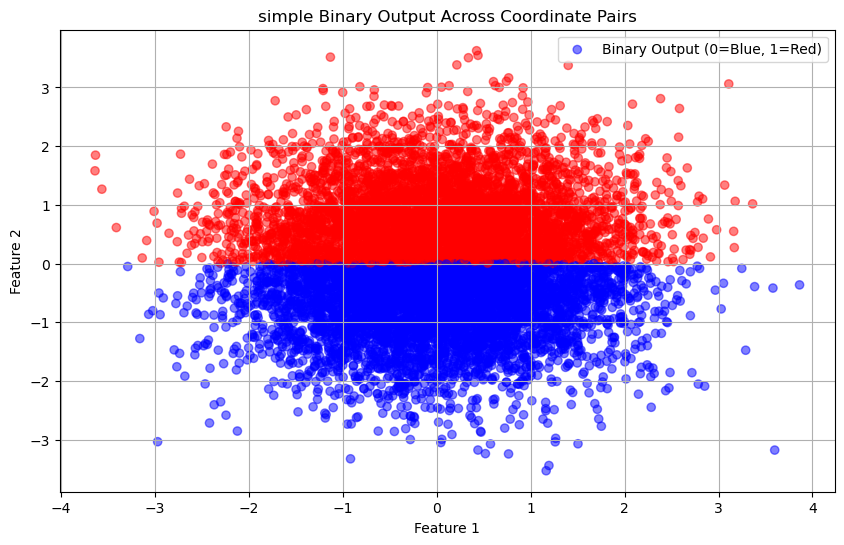

In [3]:
# Setting the seed for reproducibility
np.random.seed(19)

# Generating random data
x = np.random.randn(2, 10000)  # 2 features, 10000 samples each

# Define y based on complex conditions
y_simple = np.array([1 if b >= 0  else 0 for a, b in zip(x[0, :], x[1, :])])

# Plotting the binary outputs on the coordinate system
plt.figure(figsize=(10, 6))  # Adjusting figure size for better visibility
colors = ['blue' if label == 0 else 'red' for label in y_simple]  # Color map for the points
plt.scatter(x[0, :], x[1, :], c=colors, label='Binary Output (0=Blue, 1=Red)', alpha=0.5)
plt.title('simple Binary Output Across Coordinate Pairs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)  # Enabling grid for easier visualization
plt.legend()
plt.show()

y_simple = y_simple.astype(float).reshape(-1, 1)  # Make sure y is a column vector of floats

Iteration 0, Loss: 0.6931471805599453
Iteration 10000, Loss: 0.36411812305818286
Iteration 20000, Loss: 0.2805341811887063
Iteration 30000, Loss: 0.2396184373881852
Iteration 40000, Loss: 0.21425070139207086
Iteration 50000, Loss: 0.19652991435853343
Iteration 60000, Loss: 0.18322757828942846
Iteration 70000, Loss: 0.17275001205397655
Iteration 80000, Loss: 0.16420850517899074
Iteration 90000, Loss: 0.15706318200377217
Iteration 100000, Loss: 0.1509645610691482
Weights: [-0.00818019  4.04028874]
Bias: -0.018676290201641427
Accuracy: 99.88%


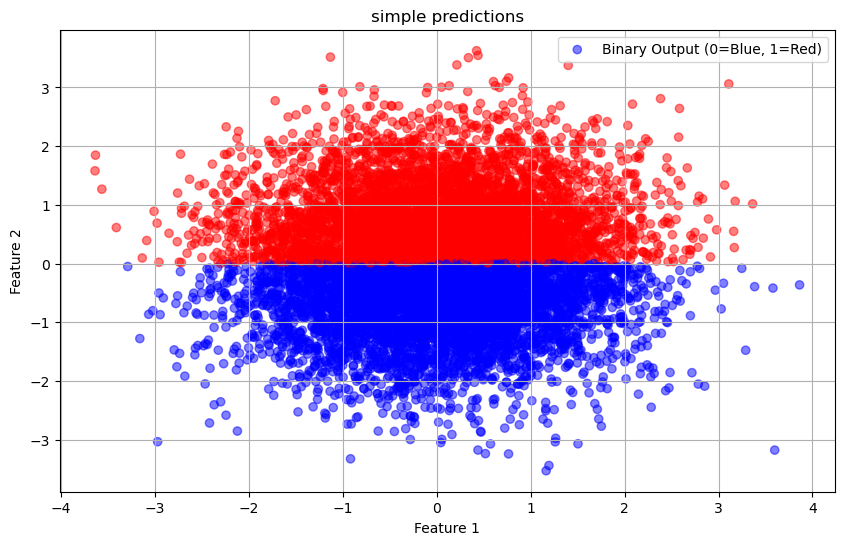

In [4]:
def lr(learning_rate, iterations, x, y):
    # Ensure y is in the correct shape (samples, 1)
    y = y.reshape(-1, 1) if y.ndim == 1 else y

    features, samples = x.shape  # Assuming x.shape == (features, samples)
    w = np.zeros((features, 1))  # Initialize weights as a column vector
    b = 0  # Initialize bias as scalar
    steps=iterations/10

    for i in range(iterations+1):
        # Forward pass
        A = np.dot(w.T, x) + b
        yp = 1 / (1 + np.exp(-A))  # Sigmoid activation
        yp = np.clip(yp, 1e-7, 1 - 1e-7)  # Avoid log(0)

        # Compute error and gradients
        error = yp - y.T
        dw = np.dot(x, error.T) / samples
        db = np.sum(error) / samples

        # Update weights and bias
        w -= learning_rate * dw
        b -= learning_rate * db

        # Optionally print loss every 1000 iterations
        if i % steps == 0:
            loss = -np.sum(y * np.log(yp).T + (1 - y) * np.log(1 - yp).T) / samples
            print(f"Iteration {i}, Loss: {loss}")

    return w, b

# x and y should be defined properly, with x of shape (features, samples) and y as (samples,)
w_simple, b_simple = lr(0.0005, 100000, x, y_simple)  # Ensure y is a column vector

print("Weights:", w_simple.ravel())  # Flatten the weight array for easier viewing
print("Bias:", b_simple) 

def predict(x, w, b):
    x = x.T  # Transpose to (samples, features)
    A = np.dot(x, w) + b
    return (1 / (1 + np.exp(-A)) >= 0.5).astype(int)

# Compute accuracy
predictions = predict(x, w_simple, b_simple)
accuracy = np.mean(predictions == y_simple)
print(f"Accuracy: {accuracy * 100:.2f}%") 

# Plotting the binary outputs on the coordinate system
plt.figure(figsize=(10, 6))  # Adjusting figure size for better visibility
colors = ['blue' if label == 0 else 'red' for label in predictions]  # Color map for the points
plt.scatter(x[0, :], x[1, :], c=colors, label='Binary Output (0=Blue, 1=Red)', alpha=0.5)
plt.title('simple predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)  # Enabling grid for easier visualization
plt.legend()
plt.show()


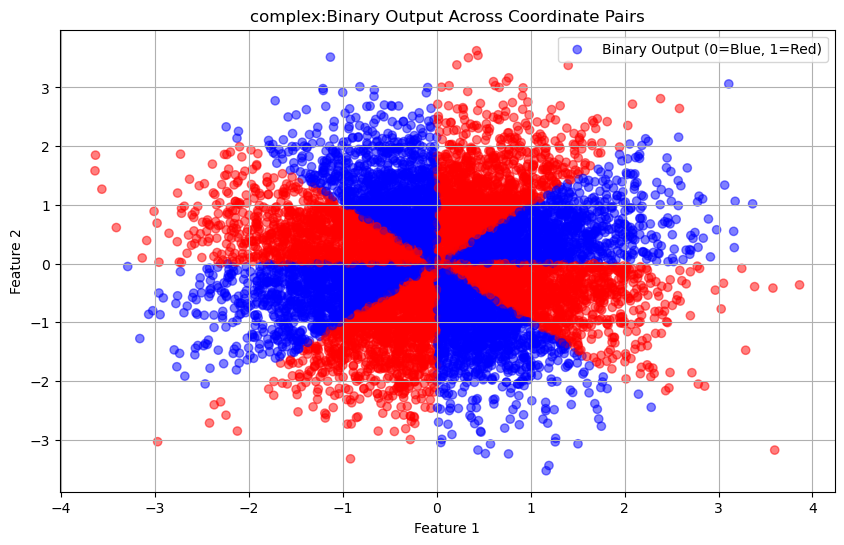

In [5]:
# Define y based on complex conditions
y = np.array([1 if (b >= a and a >= 0) or (-a >= b and b >= 0) or 
              (a >= b and a < 0) or (a >= -b and b < 0) else 0 for a, b in zip(x[0, :], x[1, :])])

# Plotting the binary outputs on the coordinate system
plt.figure(figsize=(10, 6))  # Adjusting figure size for better visibility
colors = ['blue' if label == 0 else 'red' for label in y]  # Color map for the points
plt.scatter(x[0, :], x[1, :], c=colors, label='Binary Output (0=Blue, 1=Red)', alpha=0.5)
plt.title('complex:Binary Output Across Coordinate Pairs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)  # Enabling grid for easier visualization
plt.legend()
plt.show()

y = y.astype(float).reshape(-1, 1)  # Make sure y is a column vector of floats


Iteration 0, Loss: 0.6931471805599453
Iteration 10000, Loss: 0.6930846510540647
Iteration 20000, Loss: 0.6930795793510404
Iteration 30000, Loss: 0.6930791675334733
Iteration 40000, Loss: 0.6930791340643544
Iteration 50000, Loss: 0.6930791313420424
Iteration 60000, Loss: 0.6930791311204363
Iteration 70000, Loss: 0.693079131102382
Iteration 80000, Loss: 0.6930791311009098
Iteration 90000, Loss: 0.6930791311007897
Iteration 100000, Loss: 0.6930791311007797
Weights: [0.01925481 0.0042888 ]
Bias: -0.012357704533948648
Accuracy: 54.28%


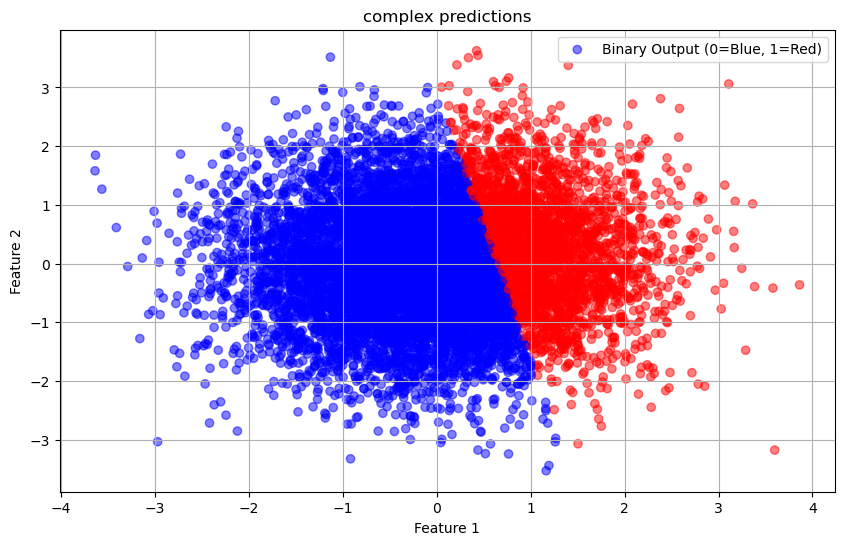

In [6]:
w, b = lr(0.0005, 100000, x, y)

print("Weights:", w.ravel())  # Flatten the weight array for easier viewing
print("Bias:", b) 

def predict(x, w, b):
    x = x.T  # Transpose to (samples, features)
    A = np.dot(x, w) + b
    return (1 / (1 + np.exp(-A)) >= 0.5).astype(int)

# Compute accuracy
predictions = predict(x, w, b)
accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy * 100:.2f}%") 

# Plotting the binary outputs on the coordinate system
plt.figure(figsize=(10, 6))  # Adjusting figure size for better visibility
colors = ['blue' if label == 0 else 'red' for label in predictions]  # Color map for the points
plt.scatter(x[0, :], x[1, :], c=colors, label='Binary Output (0=Blue, 1=Red)', alpha=0.5)
plt.title('complex predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)  # Enabling grid for easier visualization
plt.legend()
plt.show()

In [7]:
y.shape

(10000, 1)

In [8]:
def initialize_parameters(layers, activations):
    params = {}
    for l in range(1, len(layers)):  # starting from 1 since layers[0] is input dimension
        if activations[l-1] == 'relu':
            # He initialization for ReLU
            std_dev = np.sqrt(2. / layers[l-1])
        elif activations[l-1] in ['tanh', 'sigmoid', 'no activation']:
            # Xavier initialization for tanh, sigmoid, and "no activation" (assuming linear)
            std_dev = np.sqrt(1. / layers[l-1])
        else:
            raise ValueError(f"Unsupported activation type {activations[l-1]}")

        params['w' + str(l)] = np.random.randn(layers[l], layers[l-1]) * std_dev
        params['b' + str(l)] = np.zeros((layers[l], 1))

    return params

# Example of specifying layer sizes and activation functions
layers = [2, 20, 10, 5, 1]
activations = {0: 'no activation', 1: 'relu', 2: 'tanh', 3: 'tanh', 4: 'sigmoid'}
params = initialize_parameters(layers, activations) 

In [9]:
def forward(a, w, b, activation):
    z = np.dot(w, a) + b
    if activation == 'relu':
        a = np.maximum(0, z)  # Applies ReLU element-wise
    elif activation == 'tanh':
        a = np.tanh(z)  # Applies tanh element-wise
    elif activation == 'sigmoid':
        a = 1 / (1 + np.exp(-z))  # Applies sigmoid element-wise
    return a, z

In [10]:
def cost(a, y):
    m = y.shape[0]  # Assuming y is of shape (number_of_examples,1)
    # Small epsilon value to prevent log(0)
    epsilon = 1e-10
    cost = -np.sum(y.T * np.log(a + epsilon) + (1 - y.T) * np.log(1 - a + epsilon)) / m
    return np.squeeze(cost)

In [11]:
def backward(w, dz, a_pre, activation,m):
    da_pre = np.dot(w.T, dz)
    dw = np.dot(dz, a_pre.T) / m
    db = np.sum(dz, axis=1, keepdims=True) / m

    if activation == 'relu':
        dz_pre = da_pre * (da_pre > 0)  # Element-wise ReLU derivative
    elif activation == 'tanh':
        dz_pre = da_pre * (1 - np.tanh(a_pre)**2)  # Correct derivative of tanh
    elif activation == 'sigmoid':
        sigm = 1 / (1 + np.exp(-a_pre))
        dz_pre = da_pre * sigm * (1 - sigm)  # Derivative of sigmoid

    return dz_pre, dw, db
    

In [12]:
def update(w, dw, b, db, learning_rate=0.01):
    w -= learning_rate * dw
    b -= learning_rate * db
    return w, b

In [13]:
def nn(iterations, x, y, learning_rate=0.01):
    cache = {'a0': x}
    params = initialize_parameters(layers,activations)
    m = x.shape[1]
    step = max(iterations // 2.5, 1)  # Ensures at least one print if iterations < 10
    costs = np.empty((0, 2), float)

    for i in range(iterations+1):
        # Forward pass
        for l in range(1, len(layers)):  # Start l from 1 since layers list is 0 indexed but activations dictionary starts from 1
            cache['a' + str(l)], cache['z' + str(l)] = forward(cache['a' + str(l - 1)], params['w' + str(l)], params['b' + str(l)], activations[l])  # activations are accessed by layer number directly

        # Cost calculation for monitoring
        if i % step == 0 or i == iterations:
            current_cost = cost(cache['a' + str(len(layers) - 1)], y)
            costs = np.append(costs, np.array([[i, current_cost]]), axis=0)

        # Backward pass
        dz = cache['a' + str(len(layers) - 1)].T - y
        dz=dz.T
        for l in range(len(layers) - 1, 0, -1):
            dz, dw, db = backward(params['w' + str(l)], dz, cache['a' + str(l - 1)], activations[l], m)
            params['w' + str(l)], params['b' + str(l)] = update(params['w' + str(l)], dw, params['b' + str(l)], db, learning_rate)

    return params, cache, costs  # Optionally return learned parameters and cache for further analysis


In [14]:
def predict_cost_accuracy(x, y, params, layers, activations):
    a = x  # Correct initialization of 'a' with input 'x'
    for l in range(1, len(layers)):
        a, z = forward(a, params['w' + str(l)], params['b' + str(l)], activations[l])

    # Computing cost
    computed_cost = cost(a, y)  # Renaming the variable to avoid conflict
    print("Cost:", computed_cost)

    # Convert probabilities in 'a' to binary predictions (0 or 1) based on a threshold of 0.5
    predictions = (a > 0.5).astype(int)  # Assuming 'a' contains probabilities for a binary classification

    # Calculate accuracy
    accuracy = np.mean(predictions.T == y)  # Assuming 'y' is also in the same binary format
    print("Accuracy:", accuracy * 100, "%")

    return predictions,accuracy


LR=0.5
Cost: 0.6997924422374961
Accuracy: 56.10000000000001 %


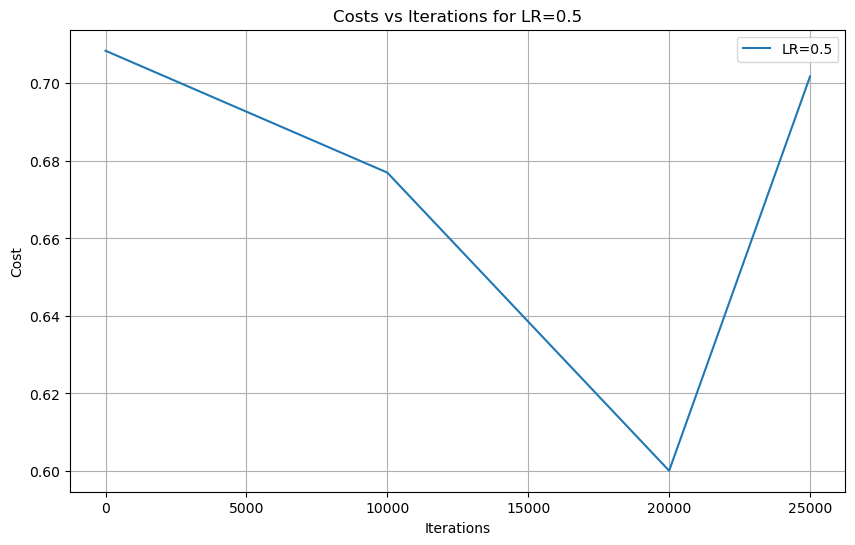

LR=0.1
Cost: 0.03230872398621811
Accuracy: 98.58 %


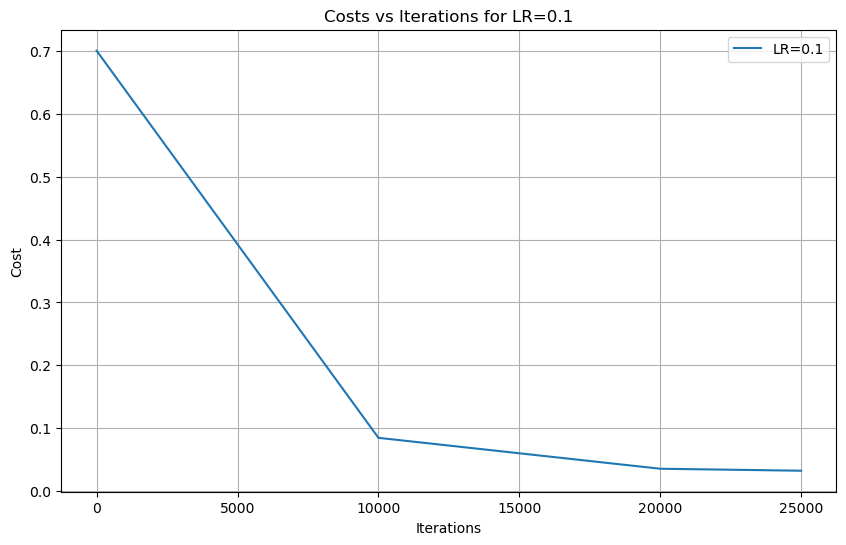

LR=0.05
Cost: 0.07619629787909121
Accuracy: 96.67 %


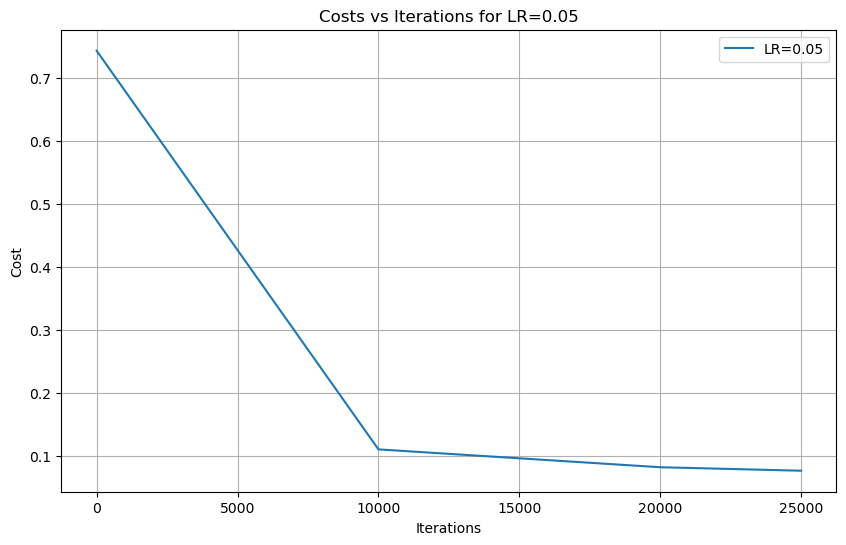

LR=0.01
Cost: 0.20467114911356674
Accuracy: 92.2 %


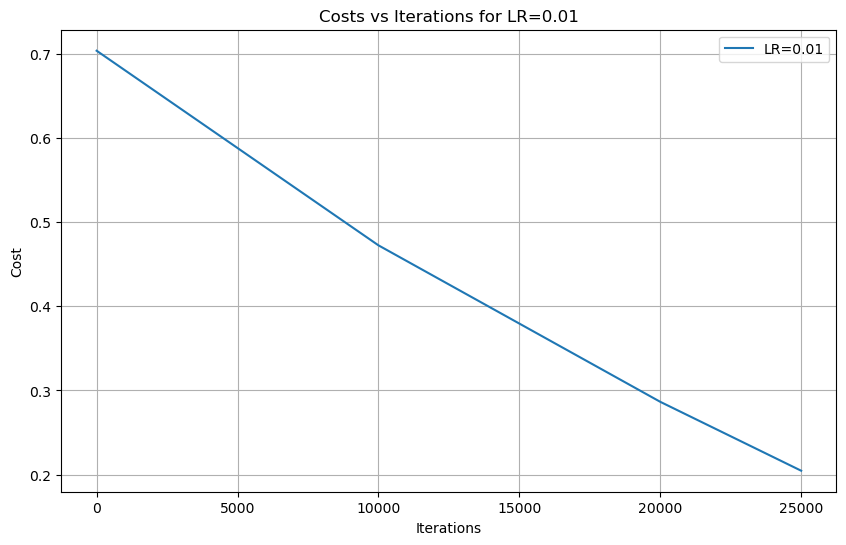

LR=0.005
Cost: 0.32437254728530074
Accuracy: 88.46000000000001 %


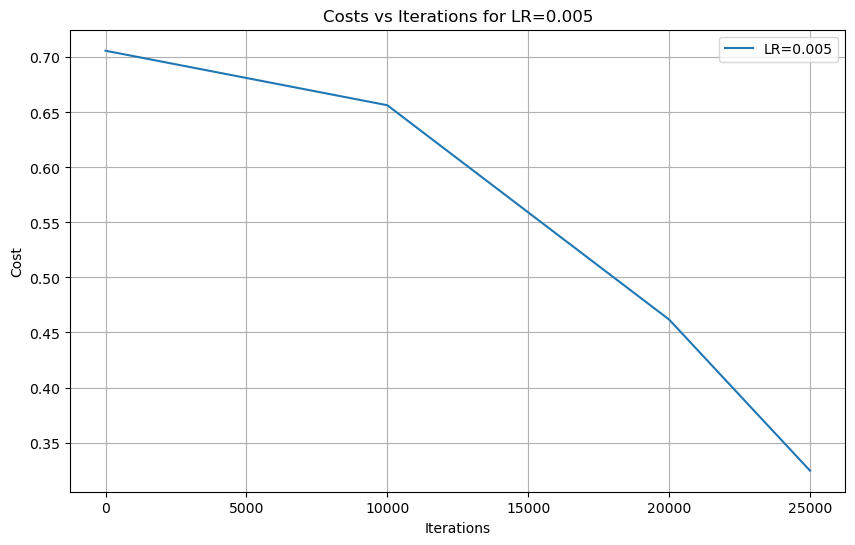

LR=0.001
Cost: 0.6720325288747463
Accuracy: 62.7 %


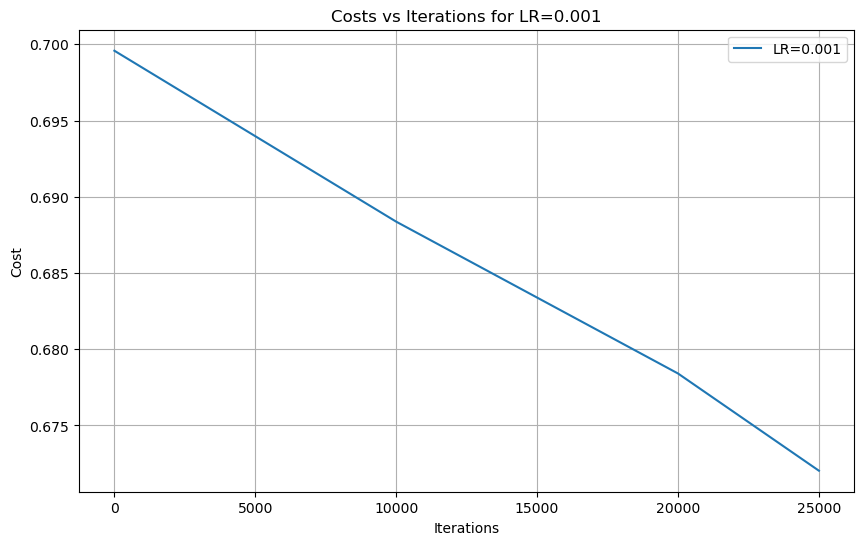

Best learning rate: 0.1 with accuracy: 0.9858


In [22]:
iterations = 25000  
learning_rates = (0.5, 0.1, 0.05, 0.01, 0.005, 0.001)
best_accuracy = 0
best_learning_rate = None
best_prediction = None

for learning_rate in learning_rates:
    print(f'LR={learning_rate}')
    params, cache, costs = nn(iterations, x, y, learning_rate)
    predictions, accuracy = predict_cost_accuracy(x, y, params, layers, activations)

    plt.figure(figsize=(10, 6))  # Adjusting figure size for better visibility
    plt.plot(costs[:, 0], costs[:, 1], label=f'LR={learning_rate}')  # Assuming costs[:,0] are iterations and costs[:,1] are costs
    plt.title(f'Costs vs Iterations for LR={learning_rate}')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.grid(True)  # Enabling grid for easier visualization
    plt.legend()
    plt.show()

    if accuracy > best_accuracy: 
        best_learning_rate = learning_rate
        best_accuracy = accuracy
        best_prediction = predictions



print(f"Best learning rate: {best_learning_rate} with accuracy: {best_accuracy}")


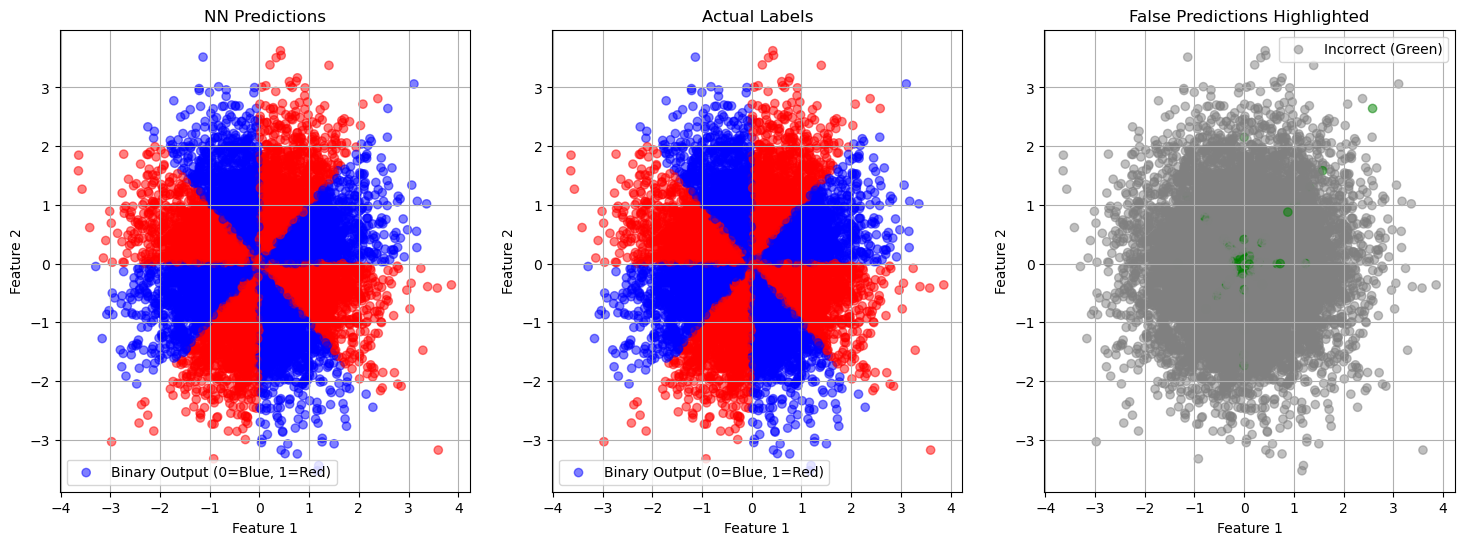

In [26]:
import matplotlib.pyplot as plt

# Assuming 'x' is 2xN and 'best_prediction' and 'y' are 1xN
plt.figure(figsize=(18, 6))  # Adjusting figure size for better visibility

# Plotting predictions
plt.subplot(1, 3, 1)  # First subplot in a 1x3 grid
colors = ['blue' if label == 0 else 'red' for label in best_prediction.flatten()]
plt.scatter(x[0, :], x[1, :], c=colors, alpha=0.5)
plt.title('NN Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.legend(['Binary Output (0=Blue, 1=Red)'])

# Plotting actual labels
plt.subplot(1, 3, 2)  # Second subplot in a 1x3 grid
colors = ['blue' if label == 0 else 'red' for label in y.flatten()]
plt.scatter(x[0, :], x[1, :], c=colors, alpha=0.5)
plt.title('Actual Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.legend(['Binary Output (0=Blue, 1=Red)'])

# Plotting false predictions
plt.subplot(1, 3, 3)  # Third subplot in a 1x3 grid
false_colors = ['green' if pred != actual else 'gray' for pred, actual in zip(best_prediction.flatten(), y.flatten())]
plt.scatter(x[0, :], x[1, :], c=false_colors, alpha=0.5)
plt.title('False Predictions Highlighted')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.legend(['Incorrect (Green)', 'Correct (Gray)'])

plt.show()


In [ ]:
def lr(iteration,learning_rate,x,y):
    n,m=x.shape
    b=0
    w= np.zeros(n)
    for i in range(Ir):
        A= np.dot(w,x)+b
        yp=1/(1+np.exp(-A))
        cost= yp-y
        loss= np.sum(cost)/m
        if i%100 == 0: 
           print(loss)


        dw=np.dot(x, cost)/m
        db=loss
        w -= dw*learning_rate
        b -= db*learning_rate

        return w,b


print(lr(1000,0.001,x,y))
    